# Intro to Astropy

## Importing astropy

You could import all of astropy, which is a huge, huge library, but it is not recommended! Ideally you import a subpackage or a class within the subpackage that is relevant to the operations of the script at hand, which is what we'll be doing in the rest of the notebook

## Quantities

First go through the slides for an introduction, and then attempt the following problem:

Calculate the gravitational force between a 3 solar mass star and its 10 Jupiter mass planet 2 au away. 

In [2]:
# import the subpackages to save quantities as objects with units and have pre-defined constants
import astropy.units as u
import astropy.constants as c

### Examples with astropy.units

In [ ]:
# create a velocity 
q = 15.1 * u.meter / (32.0 * u.second)
print(q.value)
print(q.unit)

In [ ]:
# create convert units
x = 1.0 * u.parsec
x.to(u.km)  

### Examples with astropy.constants

In [ ]:
# what does a constant object entail?
print(c.G)

### DIY

In [ ]:
#masses with units of M_sun and M_jub
m_star = 3 * c.M_sun
m_planet = 10 * c.M_jup

#distance with unit of au
distance = 2 * u.au

#Calculate gravitational force using masses distance and the gravitational constant G
F = c.G * m_star * m_planet / distance**2
print(F)

## Input and Output

### Tables

Look at the slide for information

### FITS

In [37]:
fits_img_fn

'/Users/mariavincent/anaconda3/lib/python3.11/site-packages/astropy/io/fits/tests/data/test1.fits'

In [46]:
# import i/o subpackage for reading FITS files
from astropy.io import fits

# Get path for data that came with astropy installation
fits_img_fn = fits.util.get_testdata_filepath('test0.fits')

# open HDU object for file and see what it contains
hdul = fits.open(fits_img_fn) # header data unit (HDU) list
hdul.info()

Filename: /Users/mariavincent/anaconda3/lib/python3.11/site-packages/astropy/io/fits/tests/data/o4sp040b0_raw.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     215   ()      
  1  SCI           1 ImageHDU       141   (62, 44)   int16 (rescales to uint16)   
  2  ERR           1 ImageHDU        71   ()      
  3  DQ            1 ImageHDU        71   ()      
  4  SCI           2 ImageHDU       141   (62, 44)   int16 (rescales to uint16)   
  5  ERR           2 ImageHDU        71   ()      
  6  DQ            2 ImageHDU        71   ()      


In [49]:
# what does the data look like? how do you "get data" from the file?

# fits.getdata
data_v1 = fits.getdata(fits_img_fn)
# hdul[1].data
data_v2 = hdul[1].data

## Planning Observations

Planning observations takes into account the targets, dates and times, location of observing, moon cycle, etc.

### Example: Looking at Fomalhaut

Here's a simple start-- You have to plan an observation of Fomalhaut from Subaru.

#### Step 1:  
The first step is to generate the coordinates of the star and the observing site. The packages here are a hint


In [53]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astroplan import Observer

# get coordinates of fomalhaut
fomalhaut = SkyCoord.from_name('Fomalhaut')

# get observatory info and store its coordinates as an EarthLocation
subaru = Observer.at_site('Subaru', timezone ='US/Hawaii')
subaru_loc = EarthLocation(lat=subaru.latitude, lon=subaru.longitude)

#to print this
print(f'Sky Coords of Fomalhaut: {fomalhaut} and Geocentric Coords of Subaru: {subaru_loc}')

#### Step 2:

Visualise and plot its visibility on a date of your choice

In [98]:
# determine position for a give date: Let's say Jul 31 2024
from astropy.time import Time
# coz you'll need this
import numpy as np

midnight = Time('2024-07-31 00:00:00')
# Define grid of times to calculate position over:
delta_midnight = np.linspace(-12, 12, 1000)*u.hour 
times = midnight + delta_midnight

# Set up AltAz reference frame for these times and location
frame= AltAz(obstime=times, location=subaru_loc)

# Now we transform the Fomalhaut object to the Altitute/Azimuth coordinate system
fomalhaut_altaz = fomalhaut.transform_to(frame)

In [99]:
# now... can we see this source at night? this would depend on where the sun is
from astropy.coordinates import get_sun

sun_altaz = get_sun(times).transform_to(frame)

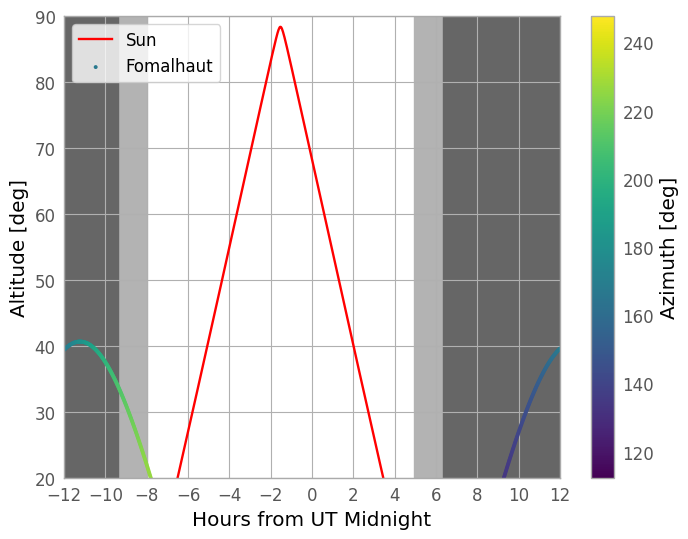

In [103]:
# for plotting
import matplotlib.pyplot as plt

# astropy's visualisation tool
from astropy.visualization import astropy_mpl_style


plt.style.use(astropy_mpl_style)

plt.figure()

# Plot the sun altitude
plt.plot(delta_midnight, sun_altaz.alt, color='r', label='Sun')

# Plot Fomalhaut's alt/az - use a colour map to represent azimuth
plt.scatter(delta_midnight, fomalhaut_altaz.alt, c = fomalhaut_altaz.az.value,
            label='Fomalhaut', lw=0, s=8,
            cmap='viridis')


# Now plot the range when the sun is below the horizon, and at least 18 degrees below 
# the horizon - this shows the range of twilight (-0 to -18 deg) and night (< -18 deg)
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sun_altaz.alt < 0*u.deg, color='0.7', zorder=0)
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sun_altaz.alt < -18*u.deg, color='0.4', zorder=0)

#now for the details
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(-12, 14, 2))
plt.ylim(20, 90)
plt.xlabel('Hours from UT Midnight')
plt.ylabel('Altitude [deg]')
plt.show()
